# CHAPTER 3
**CNN and RNN Using PyTorch**

In [1]:
import torch
import sklearn
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)

N_SAMPLES = 20
N_HIDDEN = 300

## Recipe 3-14. Restricting Model Overfitting
To restrict model overfitting, we consciously introduce dropout rate, which means randomly delete (let’s say) 10% or 20% of the weights in the network, and check the model accuracy at the same time. If we are able to match the same model accuracy after deleting the 10% or 20% of the weights, then our model is good.

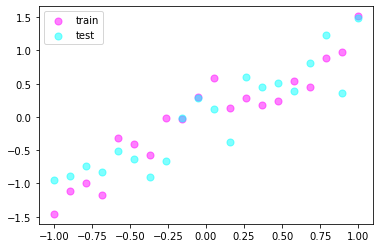

In [2]:
# training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.3 * torch.normal(
    torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1)
)
x, y = Variable(x), Variable(y)

# testing data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3 * torch.normal(
    torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1)
)
test_x, test_y = Variable(test_x), Variable(test_y)

plt.scatter(x, y, c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x, test_y, c='cyan', s=50, alpha=0.5, label='test')
plt.legend()
plt.show()

In [3]:
net_overfit = nn.Sequential(
    nn.Linear(1, N_HIDDEN),
    nn.ReLU(),
    nn.Linear(N_HIDDEN, N_HIDDEN),
    nn.ReLU(),
    nn.Linear(N_HIDDEN, 1)
)
net_drop = nn.Sequential(
    nn.Linear(1, N_HIDDEN),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(N_HIDDEN, N_HIDDEN),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(N_HIDDEN, 1)
)
print(net_overfit)
print(net_drop)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [4]:
o_optimizer = torch.optim.Adam(net_overfit.parameters(), lr=0.01)
d_optimizer = torch.optim.Adam(net_drop.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

## Recipe 3-15. Visualizing the Model Overfit

overfitting loss = 0.13689304888248444
dropped loss = 0.12660187482833862


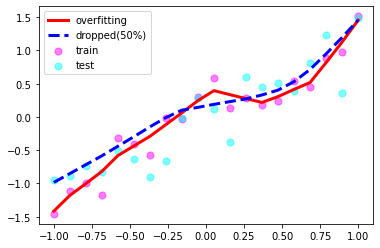

overfitting loss = 0.14619524776935577
dropped loss = 0.12913863360881805


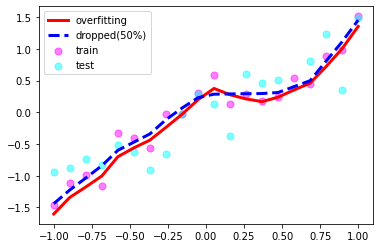

overfitting loss = 0.12982921302318573
dropped loss = 0.13363637030124664


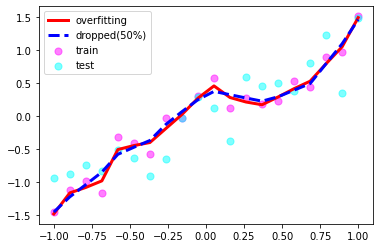

overfitting loss = 0.1237383484840393
dropped loss = 0.13535436987876892


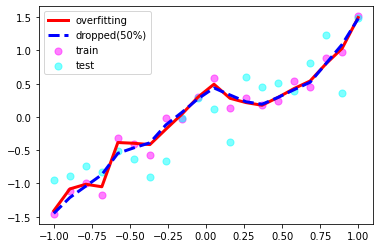

overfitting loss = 0.12491600215435028
dropped loss = 0.13145114481449127


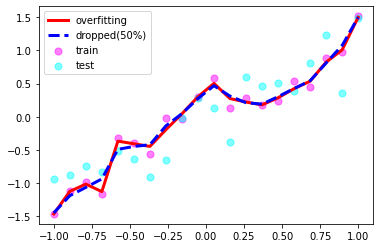

In [5]:
for epoch in range(500):
    o_pred = net_overfit(x)
    o_loss = loss_fn(o_pred, y)
    o_optimizer.zero_grad()
    o_loss.backward()
    o_optimizer.step()
    
    d_pred = net_drop(x)
    d_loss = loss_fn(d_pred, y)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()
    
    if epoch % 100 == 99:
        # change to eval model in order to fix drop out effect
        net_overfit.eval()
        net_drop.eval()
        
        test_o_pred = net_overfit(test_x)
        test_d_pred = net_drop(test_x)
        
        print('overfitting loss = {}'.format(loss_fn(test_o_pred, test_y)))
        print('dropped loss = {}'.format(loss_fn(test_d_pred, test_y)))
        
        plt.figure()
        plt.scatter(x, y, c='magenta', s=50, alpha=0.5, label='train')
        plt.scatter(test_x, test_y, c='cyan', s=50, alpha=0.5, label='test')
        plt.plot(test_x, test_o_pred.detach().numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x, test_d_pred.detach().numpy(), 'b--', lw=3, label='dropped(50%)')
        plt.legend()
        plt.show()
        

## Recipe 3-16. Initializing Weights in the Dropout Rate
We should delete the weights in the dropout layer based on probability distribution, rather than randomly.

In [6]:
torch.Tensor(5, 3)

tensor([[ 2.7493e-38,  1.0205e-28,  1.2707e-28],
        [ 3.4362e-38,  5.6253e-16,  6.0747e-07],
        [ 2.6178e+33, -2.3931e-35, -9.2505e-02],
        [-2.0408e-34, -1.2731e+02, -3.8757e-33],
        [-3.4274e+11,  5.2668e-38,  8.6881e-44]])

In [7]:
torch.Tensor(5, 3).uniform_(-1, 1)

tensor([[-0.7780,  0.8270, -0.6996],
        [ 0.1812, -0.7525,  0.7673],
        [ 0.2558, -0.8610, -0.7517],
        [ 0.6412,  0.0177, -0.8754],
        [-0.5649,  0.5097, -0.4998]])

In [8]:
print(torch.LongTensor([1]).type())
print(torch.LongTensor([1]).numpy().dtype)
print(torch.FloatTensor([1.0]).type())
print(torch.FloatTensor([1.0]).numpy().dtype)
print(torch.DoubleTensor([1.0]).type())
print(torch.DoubleTensor([1.0]).numpy().dtype)

torch.LongTensor
int64
torch.FloatTensor
float32
torch.DoubleTensor
float64


## Recipe 3-17. Adding Math Operations

In [9]:
y = torch.randn(5, 10, 15)
print(y.size())
print(y.view(-1, 15).size())
# add dim at index 1
print(y.view(-1, 15).unsqueeze(1).size())
print(y.view(-1, 15).unsqueeze(1).squeeze().size())
print()
print(y.transpose(0, 1).size())
print(y.transpose(1, 2).size())
print(y.transpose(0, 1).transpose(1, 2).size())
print(y.permute(1, 2, 0).size())

torch.Size([5, 10, 15])
torch.Size([50, 15])
torch.Size([50, 1, 15])
torch.Size([50, 15])

torch.Size([10, 5, 15])
torch.Size([5, 15, 10])
torch.Size([10, 15, 5])
torch.Size([10, 15, 5])


In [10]:
# repeat
print(torch.cat([y, y], dim=2).size())
print(torch.stack([y, y], dim=0).size())

torch.Size([5, 10, 30])
torch.Size([2, 5, 10, 15])


In [11]:
# advanced index
print(y[[0, 1, 2, 3, 4, 0, 1, 2]].size())
# pytorch does not support negative stride
# so ::-1 reports error
rev_idx = torch.arange(4, -1, -1)
print(rev_idx)
print(y[rev_idx].size())

torch.Size([8, 10, 15])
tensor([4, 3, 2, 1, 0])
torch.Size([5, 10, 15])


## Recipe 3-18. Embedding Layers in RNN

In [12]:
inputs = [[1, 2, 3], [1, 0, 4], [1, 2, 4], [1, 4, 0], [1, 3, 3]]
x = Variable(torch.tensor(inputs))

embedding = nn.Embedding(
    num_embeddings=5,
    embedding_dim=20,
    padding_idx=1
)
drop = nn.Dropout(p=0.5)
gru = nn.GRU(
    input_size=20,
    hidden_size=50,
    num_layers=2,
    batch_first=True,
    bidirectional=True,
    dropout=0.3
)
emb = drop(embedding(x))
gru_h, gru_h_t = gru(emb)
print("Embedding size =", emb.size())
print("GRU hidden states size =", gru_h.size())
print("GRU last hidden states size =", gru_h_t.size())

Embedding size = torch.Size([5, 3, 20])
GRU hidden states size = torch.Size([5, 3, 100])
GRU last hidden states size = torch.Size([4, 5, 50])
